In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import Leadangle_wave as Wave
from Leadangle_fit_JunoUVS import scaleheight
from UniversalColor import UniversalColor
from SharedX import ShareXaxis
from legend_shadow import legend_shadow

UC = UniversalColor()
UC.set_palette()

F = ShareXaxis()
F.fontsize = 15
F.fontname = 'Liberation Sans Narrow'
F.set_default()

# F.set_figparams()
# F.initialize()

Importing Library
done


In [2]:
exname = '20250422_009'
target_moon = 'Ganymede'
target_fp = ['MAW']
Ai_num = 3
ni_num = 50
Ti_num = 60

# メモ
# 20250411_004: 3d (40, 3, 45) Eu MAW (PJ 1,3,4,5,6)
# 20250411_005: 3d (40, 3, 45) Eu MAW (PJ 7,8,9,10,11)
# 20250411_006: 3d (40, 3, 45) Eu MAW (PJ 12,13,14,15,16)
# 20250411_007: 3d (40, 3, 45) Eu MAW (PJ 12,13)
# 20250411_008: 3d (40, 3, 45) Ga MAW (PJ 6)
# -
# 20250415_001: 3d (50, 3, 60) Ga MAW (PJ 6)
# 20250415_002: 3d (50, 3, 60) Eu MAW (PJ 1,3,4,5,6)
# 20250415_003: 3d (50, 3, 60) Io MAW (PJ 1,3)
# 20250415_004: 3d (50, 3, 60) Io MAW (PJ 3)
# 20250415_005: 3d (50, 3, 60) Eu MAW (PJ 3,4)
# -
# 20250421_001: 3d (50, 3, 60) Eu MAW (PJ 3)
# 20250421_002: 3d (50, 3, 60) Eu MAW (PJ 4)
# 20250421_003: 3d (50, 3, 60) Io MAW (PJ 3)
# 20250421_004: 3d (50, 3, 60) Io MAW (PJ 5)
# 20250421_005: 3d (50, 3, 60) Ga MAW (PJ 6)
# 20250421_006: 3d (50, 3, 60) Ga MAW (PJ 3)
# 20250421_007: 3d (50, 3, 60) Eu MAW (PJ 7)
# 20250421_008: 3d (50, 3, 60) Eu MAW (PJ 10)
# -
# 20250422_001: 3d (50, 3, 60) Eu MAW (PJ 7) JupiterMag centrifugal eq.
# 20250422_002: 3d (50, 3, 60) Eu MAW (PJ 10)
# 20250422_003: 3d (50, 3, 60) Io MAW (PJ 7)
# 20250422_004: 3d (50, 3, 60) Io MAW (PJ 3)
# 20250422_005: 3d (50, 3, 60) Io MAW (PJ 5)
# 20250422_006: 3d (50, 3, 60) Eu MAW (PJ 3)
# 20250422_007: 3d (50, 3, 60) Eu MAW (PJ 4)
# 20250422_008: 3d (50, 3, 60) Ga MAW (PJ 3)


chi2_1d = np.loadtxt('results/fit/test/'+exname+'/params_chi2.txt')
Ai_1d = np.loadtxt('results/fit/test/'+exname+'/params_Ai.txt')
ni_1d = np.loadtxt('results/fit/test/'+exname+'/params_ni.txt')
Ti_1d = np.loadtxt('results/fit/test/'+exname+'/params_Ti.txt')
H_1d = np.loadtxt('results/fit/test/'+exname+'/params_H.txt')
eqlead_est = np.loadtxt('results/fit/test/'+exname+'/eqlead_est.txt')
eqlead_obs = np.loadtxt('results/fit/test/'+exname+'/eqlead_obs.txt')
sigma_obs = np.loadtxt('results/fit/test/'+exname+'/sigma_obs.txt')
hem_obs = np.loadtxt('results/fit/test/'+exname+'/hems_obs.txt')
moon_S3wlon_obs = np.loadtxt('results/fit/test/'+exname+'/moon_S3wlon_obs.txt')
print(chi2_1d.shape)
print(eqlead_est.shape)

chi2_3d = chi2_1d.reshape(ni_num,Ai_num,Ti_num)
H_3d = H_1d.reshape(ni_num,Ai_num,Ti_num)
Ai_3d = Ai_1d.reshape(ni_num,Ai_num,Ti_num)
ni_3d = ni_1d.reshape(ni_num,Ai_num,Ti_num)
Ti_3d = Ti_1d.reshape(ni_num,Ai_num,Ti_num)
eqlead_est_3d = eqlead_est[1].reshape(ni_num,Ai_num,Ti_num)

# 保存されているカイ2乗値は自由度で割ってしまっているので
# ここで元に戻す
chi2_3d = chi2_3d*(eqlead_est.shape[0]-3)

print('Parameter ranges:')
print('Ai:', np.min(Ai_3d), np.max(Ai_3d))
print('ni:', np.min(ni_3d), np.max(ni_3d))
print('Ti:', np.min(Ti_3d), np.max(Ti_3d))
print('Degree of freedom:', (eqlead_est.shape[0]-3))

(9000,)
(37, 9000)
Parameter ranges:
Ai: 10.0 20.0
ni: 1.0 4999.9999999999945
Ti: 19.999999999999996 2999.9999999999977
Degree of freedom: 34


In [3]:
# %% Constants
MU0 = 1.26E-6            # 真空中の透磁率
AMU2KG = 1.66E-27        # 原子質量をkgに変換するファクタ [kg]
RJ = 71492E+3            # JUPITER RADIUS [m]
MJ = 1.90E+27            # JUPITER MASS [kg]
C = 2.99792E+8           # LIGHT SPEED [m/s]
G = 6.67E-11             # 万有引力定数  [m^3 kg^-1 s^-2]

Psyn_io = (12.89)*3600      # Moon's synodic period [sec]
Psyn_eu = (11.22)*3600      # Moon's synodic period [sec]
Psyn_ga = (10.53)*3600      # Moon's synodic period [sec]

if target_moon == 'Io':
    Psyn = Psyn_io
    r_moon = 5.9*RJ
elif target_moon == 'Europa':
    Psyn = Psyn_eu
    r_moon = 9.4*RJ
elif target_moon == 'Ganymede':
    Psyn = Psyn_ga
    r_moon = 15.0*RJ

In [4]:
print(sigma_obs)

[0.6499939  0.65000916 0.6499939  0.65000916 0.6000061  0.65000916
 0.6000061  0.6000061  0.65000916 0.59999084 0.55000305 0.44999695
 0.44999695 0.40000916 0.29998779 0.19999695 0.19999695 0.1499939
 0.1499939  0.19999695 0.20001221 0.1499939  0.20001221 0.19998169
 0.19998169 0.20001221 0.25       0.20001221 0.25       0.25
 0.25       0.25       0.29998779 0.29998779 0.25       0.29998779
 0.25      ]


In [5]:
min_idx = np.where(chi2_3d==np.min(chi2_3d))
print('Min chi2:', np.min(chi2_3d), 'at', min_idx)

print('Scale height [RJ]:', H_3d[min_idx][0]/(71492*1E+3))
print('Estimated eqlead [deg]:', eqlead_est_3d[min_idx][0])
print('Observed eqlead [deg]:', eqlead_obs[1])

Min chi2: 191.19048207999077 at (array([16]), array([0]), array([18]))
Scale height [RJ]: 4.444387028916844
Estimated eqlead [deg]: 6.200778226584547
Observed eqlead [deg]: 6.185913296331137


(60, 50)
Best fit for A_i = 10.0 amu
             n_i = 16.137153874161264 cm-3
             T_i = 92.24062653330812 eV
(60, 50)
Best fit for A_i = 15.0 amu
             n_i = 11.398522810475965 cm-3
             T_i = 278.2274524649636 eV
(60, 50)
Best fit for A_i = 20.0 amu
             n_i = 8.0513777878129 cm-3
             T_i = 597.5112731996228 eV


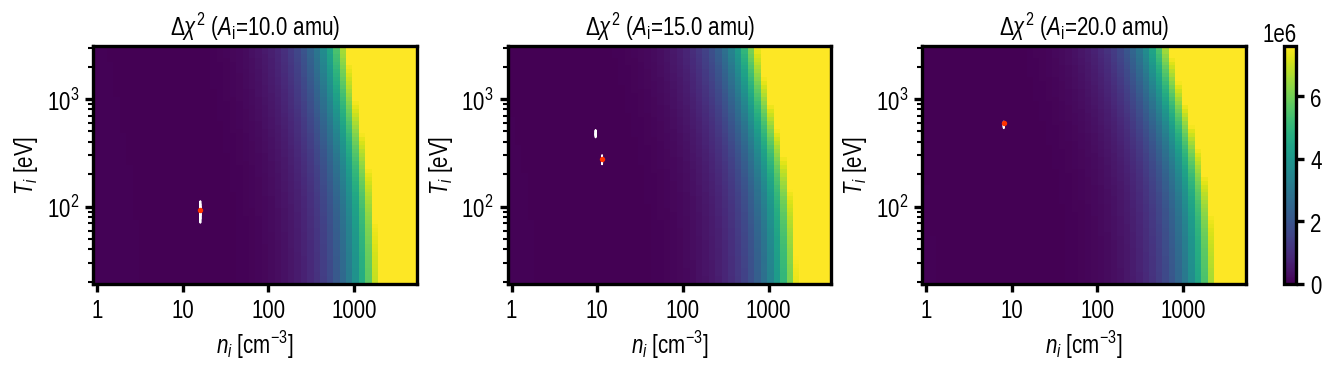

In [6]:
# 横軸 ni
fig, ax = plt.subplots(1,3,figsize=(11,3), dpi=120, layout='constrained')
for i in range(3):
    z_value = chi2_3d[::,i,::].T-np.min(chi2_3d[::,i,::])
    print(z_value.shape)

    x_value = ni_3d[::,i,::].T
    # x_value = x_value[0,:]
    y_value = Ti_3d[::,i,::].T
    # y_value = y_value[:,0]

    ax[i].set_title(r'$\Delta \chi^2$ ($A_{\rm i}$='+str(Ai_3d[0,i,0])+' amu)')
    ax[i].set_xlabel(r'$n_i$ [cm$^{-3}$]')
    ax[i].set_ylabel(r'$T_i$ [eV]')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xticks(np.array([1,10,100,1000]))
    ax[i].set_xticklabels(np.array([1,10,100,1000]))
    cn = ax[i].contour(x_value, y_value, z_value,
                       levels=[2.30, 6.17, 11.8],
                       # levels=[21.36, 30.48, 40.29],
                       colors='#ffffff',
                       linewidths=1.1,
                       zorder=2)
    p = ax[i].pcolormesh(x_value,
                         y_value,
                         z_value, 
                         vmin=0, vmax=np.std(z_value), zorder=0.5)

    # Location of the chi2 minimum
    x_best = x_value[np.where(z_value==np.min(z_value))]
    y_best = y_value[np.where(z_value==np.min(z_value))]
    ax[i].scatter(x_best, y_best, 
                  s=5, color=UC.red, zorder=2.5)
    
    if target_moon == 'Europa':
        ax[i].scatter(1207/18, 87, 
                    s=7, color=UC.orange, 
                    marker='*', zorder=2.5)
        ax[i].scatter(1708/18, 195, 
                    s=7, color=UC.orange, 
                    marker='+', zorder=2.5)

    # Best fit parameter
    print('Best fit for A_i = '+str(Ai_3d[0,i,0])+' amu')
    print('             n_i = '+str(x_best[0])+' cm-3')
    print('             T_i = '+str(y_best[0])+' eV')

fig.colorbar(p)
plt.show()

(60, 50)
(60, 50)
(60, 50)


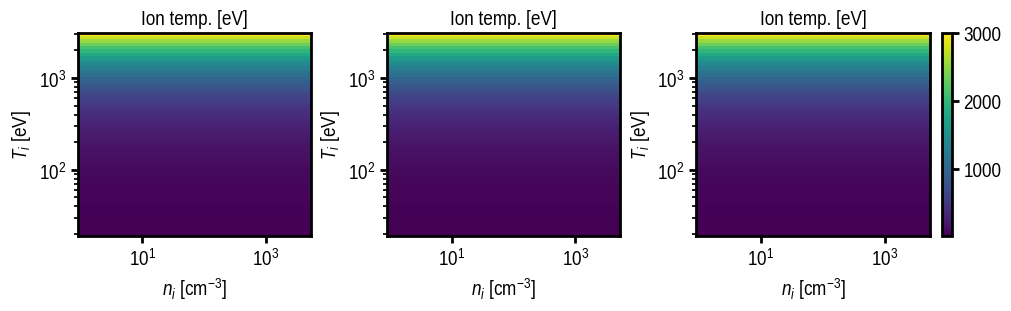

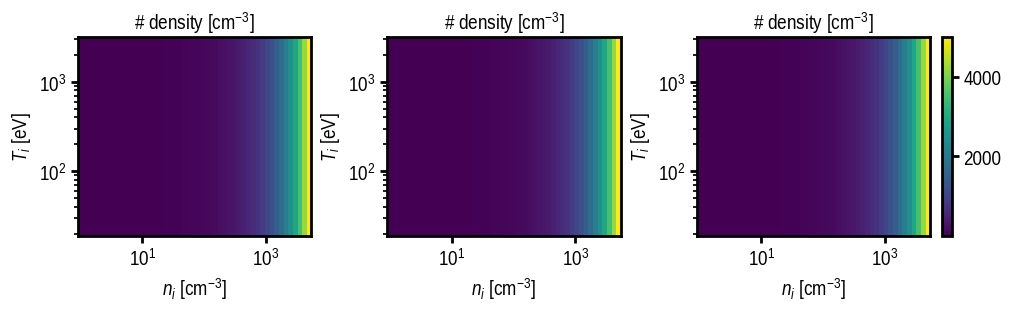

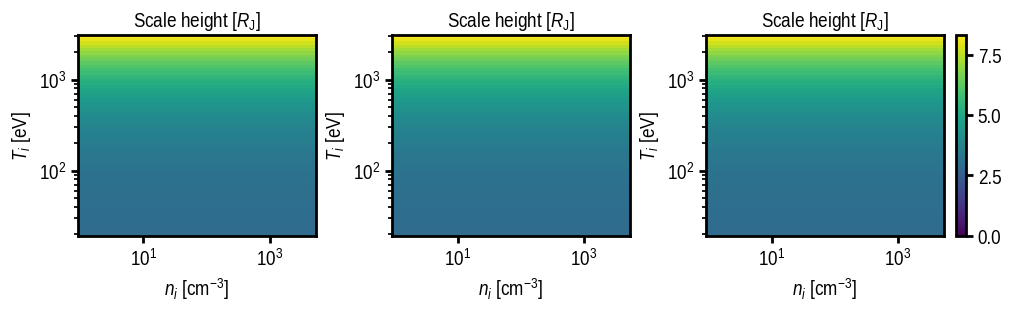

In [7]:
fig, ax = plt.subplots(1,3,figsize=(10,3), layout='constrained')
for i in range(3):
    z_value = Ti_3d[::,i,::].T
    print(z_value.shape)

    x_value = ni_3d[::,i,::].T
    x_value = x_value[0,:]
    y_value = Ti_3d[::,i,::].T
    y_value = y_value[:,0]
    
    ax[i].set_title(r'Ion temp. [eV]')
    ax[i].set_xlabel(r'$n_i$ [cm$^{-3}$]')
    ax[i].set_ylabel(r'$T_i$ [eV]')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    p = ax[i].pcolormesh(x_value,
                         y_value,
                         z_value, 
                         vmin=np.min(z_value), vmax=np.max(z_value))

fig.colorbar(p)
plt.show()

fig, ax = plt.subplots(1,3,figsize=(10,3), layout='constrained')
for i in range(3):
    z_value = ni_3d[::,i,::].T
    # print(z_value.shape)

    x_value = ni_3d[::,i,::].T
    x_value = x_value[0,:]
    y_value = Ti_3d[::,i,::].T
    y_value = y_value[:,0]
    
    ax[i].set_title(r'# density [cm$^{-3}$]')
    ax[i].set_xlabel(r'$n_i$ [cm$^{-3}$]')
    ax[i].set_ylabel(r'$T_i$ [eV]')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    p = ax[i].pcolormesh(x_value, 
                         y_value, 
                         z_value, 
                         vmin=np.min(z_value), vmax=np.max(z_value))

fig.colorbar(p)
plt.show()

fig, ax = plt.subplots(1,3,figsize=(10,3), layout='constrained')
for i in range(3):
    z_value = (H_3d[::,i,::].T)/RJ
    # print(z_value.shape)

    x_value = ni_3d[::,i,::].T
    x_value = x_value[0,:]
    y_value = Ti_3d[::,i,::].T
    y_value = y_value[:,0]
    
    ax[i].set_title(r'Scale height [$R_{\rm J}$]')
    ax[i].set_xlabel(r'$n_i$ [cm$^{-3}$]')
    ax[i].set_ylabel(r'$T_i$ [eV]')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    p = ax[i].pcolormesh(x_value, 
                         y_value, 
                         z_value, 
                         vmin=0, vmax=np.max(z_value))

fig.colorbar(p)
plt.show()

In [8]:
# Moon position when the Alfven waves launched (Time: t0-tau_A)
r_A0_arr = r_moon*np.ones(55)
S3wlon_A0_arr = np.linspace(-50,370,r_A0_arr.size)
Ai_best = Ai_3d[min_idx][0]
ni_best = ni_3d[min_idx][0]
Hp_best = H_3d[min_idx][0]

eqlead_bestfit_N = np.zeros(r_A0_arr.size)
eqlead_bestfit_S = np.zeros(r_A0_arr.size)
for i in range(r_A0_arr.size):
    r_A0 = r_A0_arr[i]
    S3wlon_A0 = S3wlon_A0_arr[i]
    S_A0 = Wave.Awave().tracefield(r_A0,
                                np.radians(S3wlon_A0),
                                1
                                )
    tau, _, _, _ = Wave.Awave().trace3(r_A0,
                                    np.radians(S3wlon_A0),
                                    0,
                                    S_A0,
                                    Ai_best,
                                    ni_best,
                                    Hp_best,
                                    -1
                                    )
    
    eqlead_bestfit_N[i] = tau*360/Psyn     # [deg]

    tau, _, _, _ = Wave.Awave().trace3(r_A0,
                                    np.radians(S3wlon_A0),
                                    0,
                                    S_A0,
                                    Ai_best,
                                    ni_best,
                                    Hp_best,
                                    1
                                    )
    
    eqlead_bestfit_S[i] = tau*360/Psyn     # [deg]

Tracing field line 1 of 1 (100.00)%


Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (100.00)%
Tracing field line 1 of 1 (

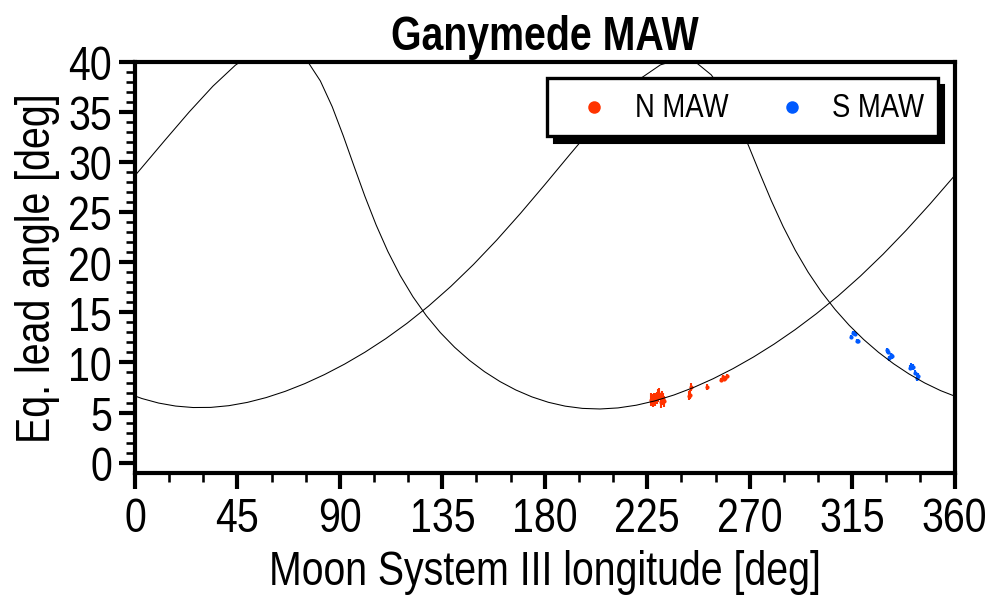

In [9]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,4), ticksize=1.5,
                dpi='M')
F.initialize()

ymax = 1
if target_moon == 'Io':
    ymax = 12
elif target_moon == 'Europa':
    ymax = 15
elif target_moon == 'Ganymede':
    ymax = 40

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. lead angle [deg]',
            min=-1, max=ymax,
            ticks=np.arange(0,ymax+1,5),
            ticklabels=np.arange(0,ymax+1,5),
            minor_num=5)

north = np.where((hem_obs==-1))
F.ax.scatter(moon_S3wlon_obs[north], eqlead_obs[north], 
             s=1, color=UC.red,
             label='N MAW',
             zorder=0.7)
F.ax.errorbar(moon_S3wlon_obs[north], eqlead_obs[north], 
            yerr=np.array([np.abs(sigma_obs[north]), 
                            np.abs(sigma_obs[north])]),
            linewidth=0., markersize=2,
            elinewidth=1.0, color=UC.red,
            zorder=0.7)

south = np.where((hem_obs==1))
F.ax.scatter(moon_S3wlon_obs[south], eqlead_obs[south], 
             s=1, color=UC.blue,
             label='S MAW',
             zorder=0.7)
F.ax.errorbar(moon_S3wlon_obs[south], eqlead_obs[south], 
            yerr=np.array([np.abs(sigma_obs[south]), 
                            np.abs(sigma_obs[south])]),
            linewidth=0., markersize=2,
            elinewidth=1.0, color=UC.blue,
            zorder=0.7)

if len(target_moon) == 2:
    south = np.where((hem_obs==101))
    F.ax.scatter(moon_S3wlon_obs[south], eqlead_obs[south], 
                s=1, color=UC.green,
                label='S TEB',
                zorder=0.7)
    F.ax.errorbar(moon_S3wlon_obs[south], eqlead_obs[south], 
                yerr=np.array([np.abs(sigma_obs[south]), 
                                np.abs(sigma_obs[south])]),
                linewidth=0., markersize=2,
                elinewidth=1.0, color=UC.green,
                zorder=0.7)

F.ax.plot(S3wlon_A0_arr+eqlead_bestfit_N, eqlead_bestfit_N, color='k', linewidth=0.5)
F.ax.plot(S3wlon_A0_arr+eqlead_bestfit_S, eqlead_bestfit_S, color='k', linewidth=0.5)

fig_title = target_moon
for i in range(len(target_fp)):
    if i == 0:
        fig_title += ' '+target_fp[i]
    if i > 0:
        fig_title += '&'+target_fp[i]
F.ax.set_title(fig_title, fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper right', ncol=4, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False, handletextpad=0.2)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

(4, 3, 5)
(4, 3, 5)
[[0.  0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5 0.5]
 [1.  1.  1.  1.  1. ]]


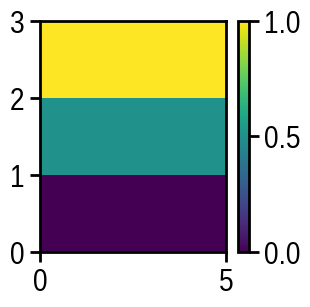

[[0.58550868 0.75699482 0.31535573 0.23513238]
 [0.5137117  0.86210681 0.33350961 0.57562606]
 [0.40701582 0.22050497 0.85698117 0.97141485]]


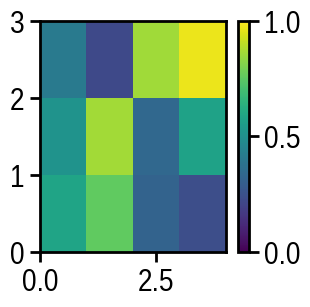

[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


In [10]:
a = np.linspace(0,1,3)
b = np.linspace(10,50,4)
c = np.linspace(100,200,5)

a_mesh, b_mesh, c_mesh = np.meshgrid(a, b, c)
print(a_mesh.shape)

a_1d = a_mesh.reshape(a.size*b.size*c.size)
b_1d = b_mesh.reshape(a.size*b.size*c.size)
c_1d = c_mesh.reshape(a.size*b.size*c.size)

a_3d = a_1d.reshape((b.size, a.size, c.size))
b_3d = b_1d.reshape((b.size, a.size, c.size))
print(a_3d.shape)

print(a_3d[0,:,:])

fig, ax = plt.subplots(figsize=(3,3))
p = ax.pcolormesh(a_3d[0,:,:])
fig.colorbar(p)
plt.show()

random_arr = np.random.rand(12)
random_arr = np.reshape(random_arr, (3,4))
print(random_arr)
fig, ax = plt.subplots(figsize=(3,3))
p = ax.pcolormesh(random_arr, vmin=0, vmax=1)
fig.colorbar(p)
plt.show()

print(b_mesh-b_3d)

In [11]:
from Leadangle_fit_JunoUVS import spice_moonS3